In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/Variant-AutoEncoder /content

In [3]:
def train(config):
    args = ""
    for k, v in config.items():
        if k.startswith("_"):
            args += f'"{v}" '
        elif isinstance(v, str):
            args += f'--{k}="{v}" '
        elif isinstance(v, bool) and v:
            args += f"--{k} "
        elif isinstance(v, float) and not isinstance(v, bool):
            args += f"--{k}={v} "
        elif isinstance(v, int) and not isinstance(v, bool):
            args += f"--{k}={v} "

    return args

In [4]:
save_dir = "/content/outputs"
imgsz = 32
lr = 1e-4
epochs = 100
in_chans = 3
latent_dim = 128
logs = "/content/logs"
early_stop = 10
B = 50
reduction = "mean"


In [5]:
train_config = {
    "save-dir": save_dir,
    "imgsz": imgsz,
    "lr": lr,
    "epochs": epochs,
    "in-chans": in_chans,
    "latent-dim": latent_dim,
    "log-dir": logs,
    "early-stop-patience": early_stop,
    "B": B,
    "reduction": reduction,
}

In [10]:
train_args = train(train_config)
script = f"""
python /content/Variant-AutoEncoder/VAE/train.py {train_args}--visualize
"""

print(script)


python /content/Variant-AutoEncoder/VAE/train.py --save-dir="/content/outputs" --imgsz=32 --lr=0.0001 --epochs=100 --in-chans=3 --latent-dim=128 --log-dir="/content/logs" --early-stop-patience=10 --B=50 --reduction="mean" --visualize



In [7]:
!{script}

100% 170M/170M [00:03<00:00, 45.2MB/s]
Epoch 1/100: Train_Loss: 3.9247798319244387 Reconstruction Loss: 0.0742568053305149, KL Divergence: 0.21193956785678864

=== Val_loss: 5.545353, Val Reconstruction Loss: 0.108056, Val KL Divergence: 0.142538

Best model saved at epoch 1
Epoch 2/100: Train_Loss: 3.604804851989746 Reconstruction Loss: 0.06898192333221435, KL Divergence: 0.15570868865013124

=== Val_loss: 6.070344, Val Reconstruction Loss: 0.118318, Val KL Divergence: 0.154431

Early stopping patience: 1/10
Epoch 3/100: Train_Loss: 3.5752409082794188 Reconstruction Loss: 0.0683822841668129, KL Divergence: 0.15612670242547988

=== Val_loss: 6.346530, Val Reconstruction Loss: 0.124138, Val KL Divergence: 0.139620

Early stopping patience: 2/10
Epoch 4/100: Train_Loss: 3.5539093352508546 Reconstruction Loss: 0.06790605873346328, KL Divergence: 0.15860640166282655

=== Val_loss: 5.736978, Val Reconstruction Loss: 0.111344, Val KL Divergence: 0.169785

Early stopping patience: 3/10
Epoch 

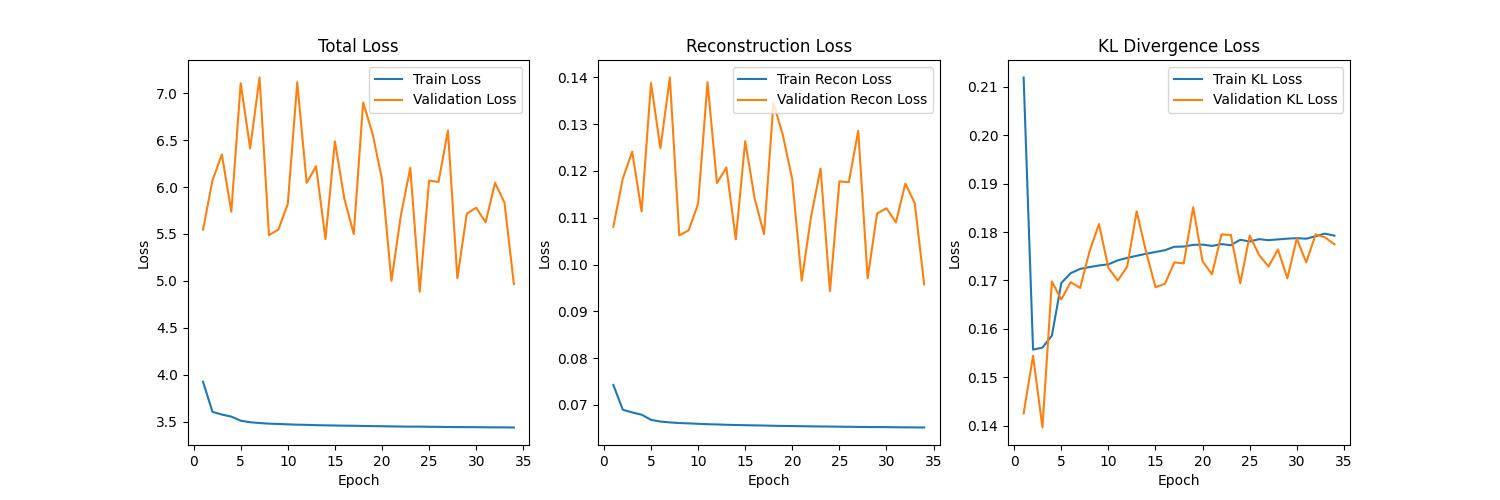

In [9]:
from IPython.display import display
from PIL import Image
display(Image.open("/loss_plot.jpg"))